In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')
credit.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(['Sl_No', 'Customer Key'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

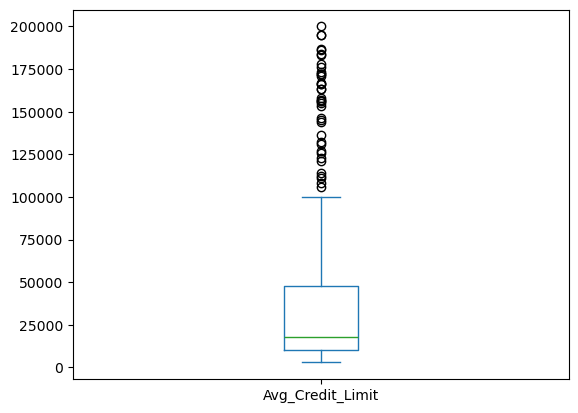

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier:  660
Jumlah data sebelum dibuang outlier:  621


<Axes: >

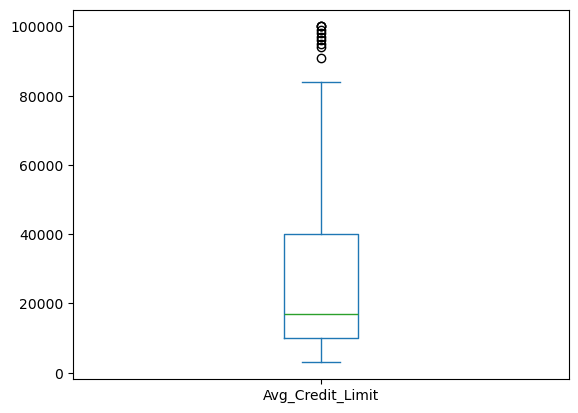

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier="Avg_Credit_Limit"):
    # Menghitung batas bawah dan batas atas menggunakan quantile 25% dan 75%
    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan bawah untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Memfilter data untuk menghapus outlier
    data_frame_no_outliers = data_frame[(data_frame[kolom_outlier] >= lower_bound) & (data_frame[kolom_outlier] <= upper_bound)]

    return data_frame_no_outliers

data_bersih = remove_outlier(df_credit)

print("Jumlah data sebelum dibuang outlier: ", df_credit.shape[0])
print("Jumlah data sebelum dibuang outlier: ", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

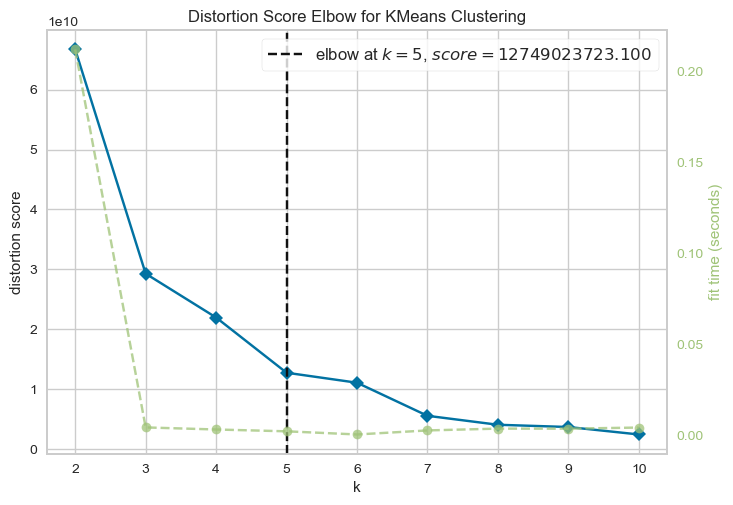

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans (random_state=0)
vis = KElbowVisualizer(KMeansC,k=(2,11))
vis.fit(data_bersih)

vis.show()

Silhoutte Score K-Means for  2  clusters : 0.7275517813087928
Silhoutte Score K-Means for  3  clusters : 0.7058100919802311
Silhoutte Score K-Means for  4  clusters : 0.5928895843252326
Silhoutte Score K-Means for  5  clusters : 0.6039773808643728
Silhoutte Score K-Means for  6  clusters : 0.5561748553700107
Silhoutte Score K-Means for  7  clusters : 0.5988247715843502
Silhoutte Score K-Means for  8  clusters : 0.5883936959989691
Silhoutte Score K-Means for  9  clusters : 0.5834209460817851
Silhoutte Score K-Means for  10  clusters : 0.6027794287285431


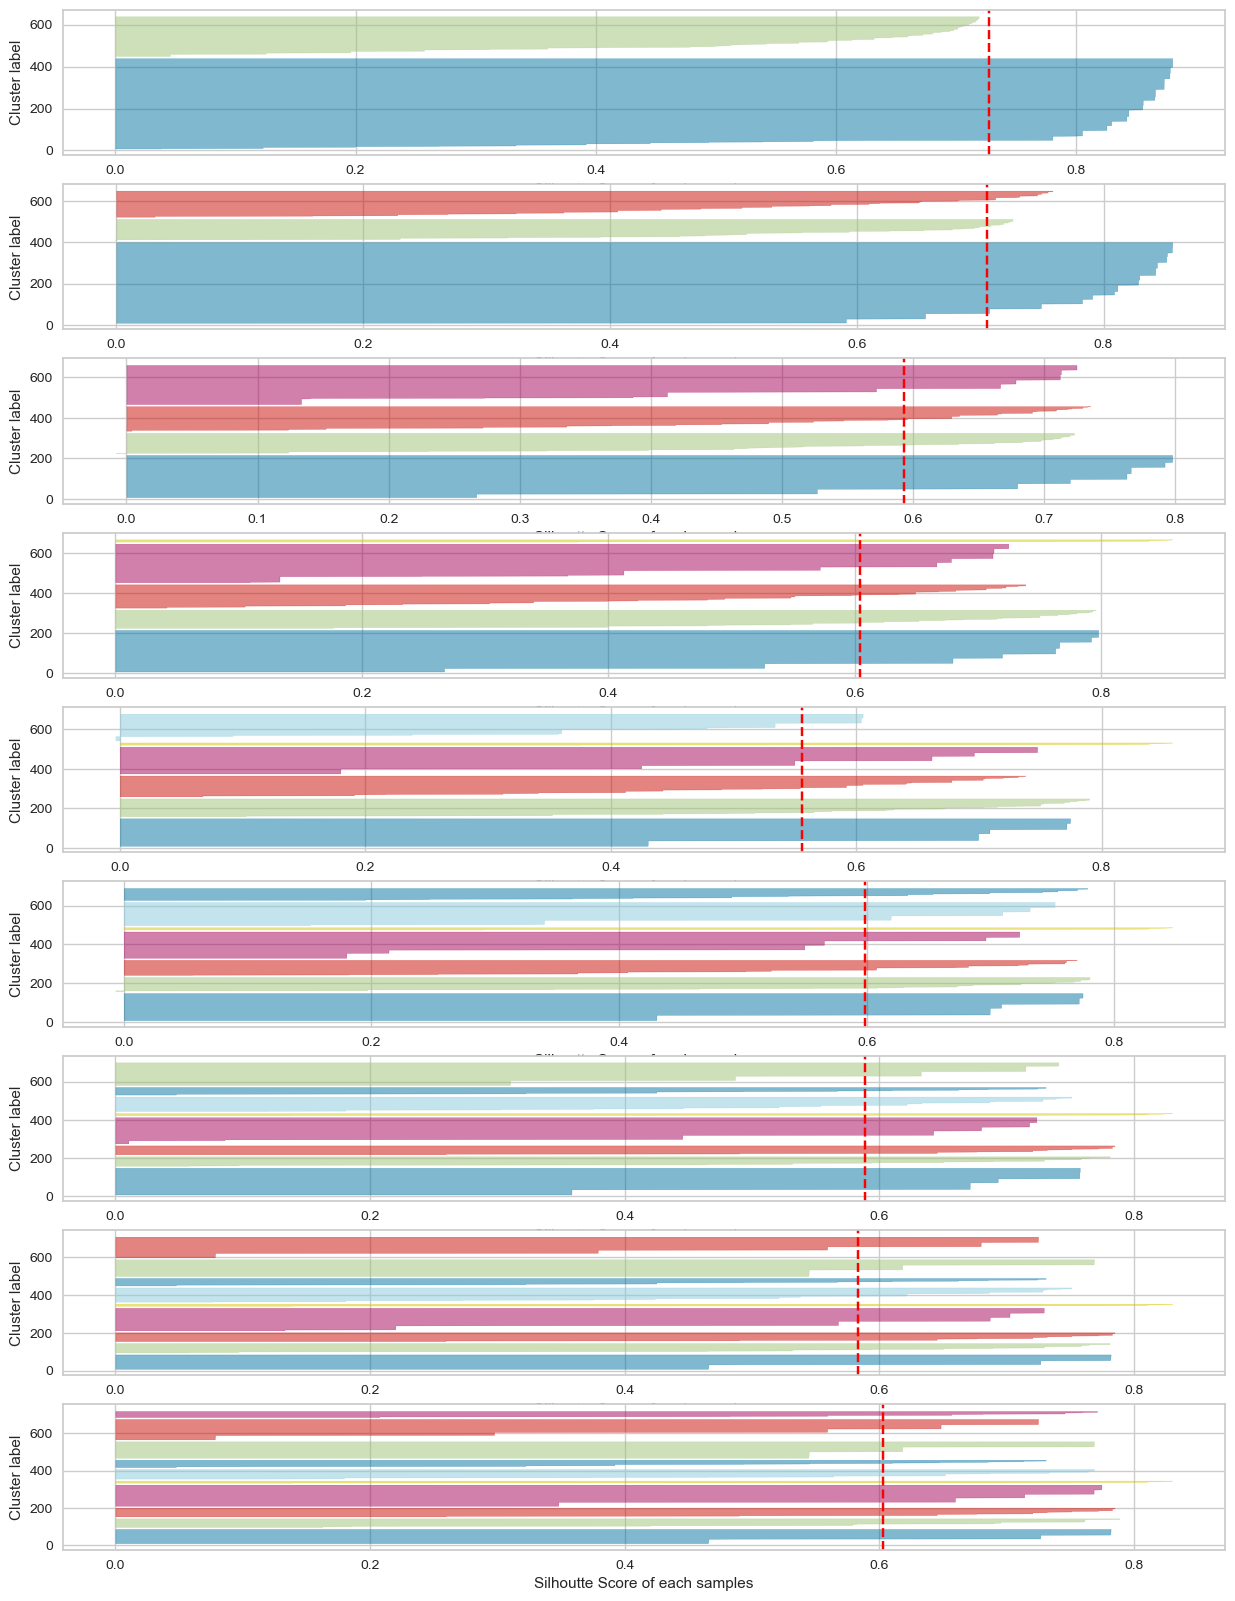

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=0)

    KM_clusters=KMeansC.fit_predict(data_bersih)
    print("Silhoutte Score K-Means for ", k , " clusters :", silhouette_score(data_bersih, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    ax[k-2].set(xlabel="Silhoutte Score of each samples", ylabel="Cluster label")



In [8]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

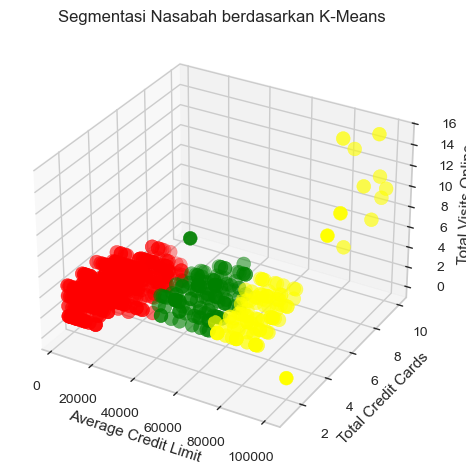

Silhouette Score K-Means: 0.708


In [9]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state= 2) #220711902
K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

clusters_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4:'magenta', 5:'black' ,6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[clusters_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

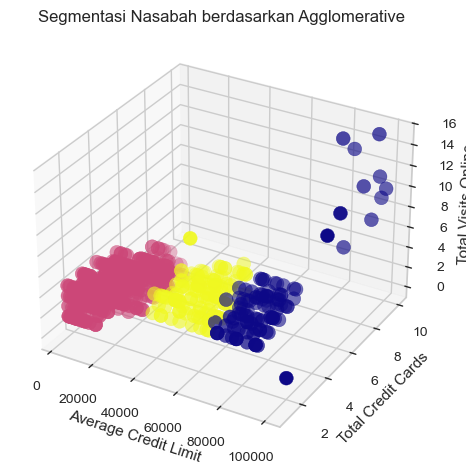

Silhouette Score AGG: 0.705


In [10]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)


plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()
print("Silhouette Score AGG: %0.3f" % silhouette_score(data_bersih, AGG_clusters))


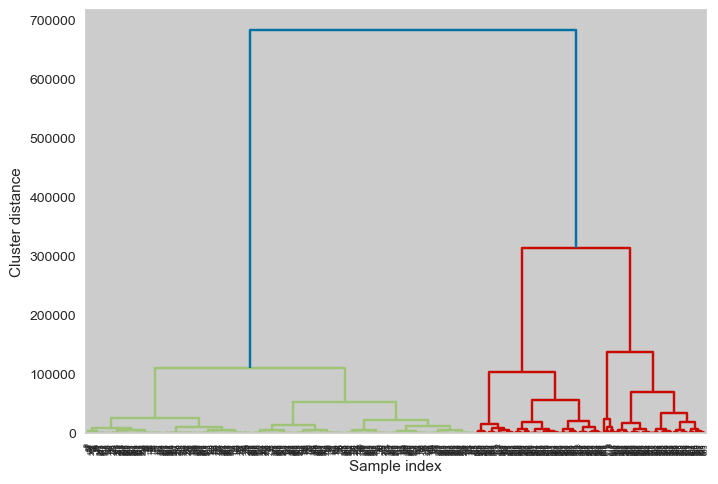

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array= linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

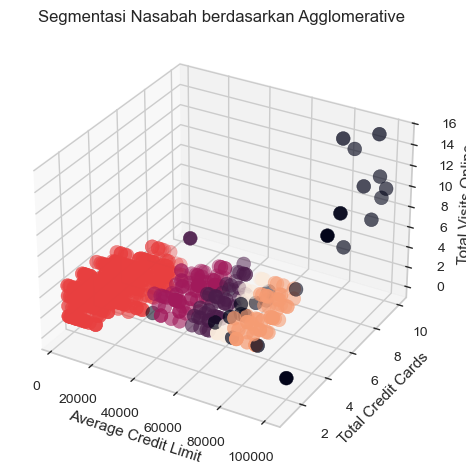

Silhouette Score AGG: 0.657


In [12]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)


plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()
print("Silhouette Score AGG: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [13]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
